In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.5.0


In [5]:
df = pd.read_excel('/content/drive/MyDrive/MasterThesis/DataSet-forUsing/7-offDSA2020-dev-train-8000-MixWithNuhaDS.xlsx',header=None)
df.head()

,0,1,2,3
0,tweets,off,hs,new-label
1,فى حاجات مينفعش نلفت نظركوا ليها زى الاصول كده...,NOT_OFF,NOT_HS,not-hate
2,RT @USER: وعيون تنادينا تحايل فينا و نقول يا ع...,NOT_OFF,NOT_HS,not-hate
3,يا بلادي يا أم البلاد يا بلادي بحبك يا مصر بحب...,NOT_OFF,NOT_HS,not-hate
4,RT @USER: يا رب يا قوي يا معين مدّني بالقوة و ...,NOT_OFF,NOT_HS,not-hate


In [6]:
df.columns = ['tweets', 'off','hs','new-label']
df.head()

,tweets,off,hs,new-label
0,tweets,off,hs,new-label
1,فى حاجات مينفعش نلفت نظركوا ليها زى الاصول كده...,NOT_OFF,NOT_HS,not-hate
2,RT @USER: وعيون تنادينا تحايل فينا و نقول يا ع...,NOT_OFF,NOT_HS,not-hate
3,يا بلادي يا أم البلاد يا بلادي بحبك يا مصر بحب...,NOT_OFF,NOT_HS,not-hate
4,RT @USER: يا رب يا قوي يا معين مدّني بالقوة و ...,NOT_OFF,NOT_HS,not-hate


In [7]:
df = df.drop(['hs','new-label'], axis=1)

Text(0.5, 1.0, 'Sentiment Data Distribution')

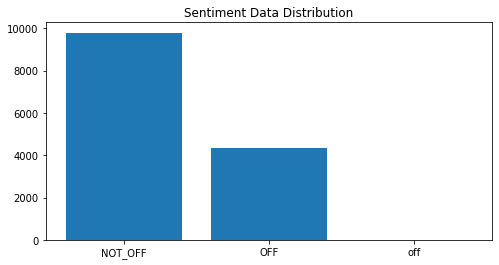

In [8]:
val_count = df.off.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [9]:
import random
random_idx_list = [random.randint(1,len(df.tweets)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,tweets,off
386,@USER هيا ورينا مكوتك يا مهايطي يا كذاب هههههه...,OFF
14101,السبب الحقيقي هو الايمان برجل الدوله الذي يمثل...,OFF
3523,@USER لك يا قدس السلام وسلاماً يا بلادي<LF>إن ...,NOT_OFF
4156,@USER يا ربي يا جودي يا رببيي 😔,NOT_OFF
7631,RT @USER: يا لطيفا بالبرايا يا كريم يا جواد هذ...,NOT_OFF
5530,@USER @USER يا قرمط يا حبيبي انا مانكرش ان لسة...,NOT_OFF
7230,وابقى ماشى بالعجلة فى حالى فى امان الله ويدخل ...,NOT_OFF
8974,مراتى المسلمة رافعة الصليب على راسها وبزازها ز...,OFF
9163,لا مصلحة ل #ايران وأداتها #حزبالة بالمقاربة بي...,NOT_OFF
1128,ازاي يا حبيبي يا عمري يا أغلى الناس في عنيا ؟,NOT_OFF


#Text Preprocessing¶


In [10]:
text_cleaning_re = "[a-zA-Z]|\d+|[٠١٢٣٤٥٦٧٨٩]|[.،<>@,\\-_”“٪ًَ]"
# stop_words = stopwords.words('arabic')


In [11]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  text = re.sub(r'(.)\1+', r'\1\1', str(text)) 
  text = re.sub("[إأآا]", "ا", text)
  # text = re.sub("ى", "ي", text)
  # text = re.sub("ؤ", "ء", text)
  # text = re.sub("ئ", "ء", text)
  text = re.sub("ة", "ه", str(text))
  tokens = []
  for token in text.split():
    # if token not in stop_words:
      tokens.append(token)
  return " ".join(tokens)

In [12]:
# preprocess('ههههههه 156562@#')

In [13]:
df.tweets = df.tweets.apply(lambda x: preprocess(x))
df.tweets[:10]

0                                                     
1    فى حاجات مينفعش نلفت نظركوا ليها زى الاصول كده...
2    : وعيون تنادينا تحايل فينا و نقول يا عيونه يا ...
3    يا بلادي يا ام البلاد يا بلادي بحبك يا مصر بحب...
4    : يا رب يا قوي يا معين مدّني بالقوه و العون و ...
5                    : رحمك الله يا صدام يا بطل ومقدام
6    يا جابر يا بنجرجي يا مرتزق يا حثاله الحمدين يا...
7    : يا انـتِ يا بعضــي وكلــي وذاتــي يا لـون ال...
8                    كحل عينك يا منحط يا وضيع يا متخلف
9    لعنه الله عليك يا النذل يا الواطي ولعنه الله ع...
Name: tweets, dtype: object

In [14]:
# def remove_Eng_Char(input_text):
#         return re.sub('[a-zA-Z]', '', str(input_text))
#         # return re.sub(r'[a-zA-Z]|\d+|[٠١٢٣٤٥٦٧٨٩]', '', str(input_text))
        
# def remove_Numbers(input_text):
#     return re.sub(r'\d+|[٠١٢٣٤٥٦٧٨٩]', ' ', str(input_text)) 

# def remove_Punct(input_text):
#     return re.sub(r'[.،<>@,\\-_”“٪ًَ]', ' ', str(input_text)) 

# def remove_repeating_char(text):
#     return re.sub(r'(.)\1+', r'\1\1', str(text))     # keep 2 repeat
    
# def normalize_arabic(text):
#     # text = remove_diacritics(text)
#     text = re.sub("[إأآا]", "ا", text)
#     text = re.sub("ى", "ي", text)
#     text = re.sub("ؤ", "ء", text)
#     text = re.sub("ئ", "ء", text)
#     text = re.sub("ة", "ه", text)
#     text = re.sub("گ", "ك", text)
#     return text

# # x=remove_repeating_char('مشكووووور ،!؟')     
# print(df.head())

# df.tweets = df.tweets.apply(remove_repeating_char).apply(remove_Eng_Char).apply(normalize_arabic).apply(remove_Numbers).apply(remove_Punct)
# print(df.head())

In [15]:
!pip install wordcloud-fa

     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 368kB 45.9MB/s 
     |████████████████████████████████| 317kB 50.6MB/s 
     |████████████████████████████████| 1.4MB 45.8MB/s 
     |████████████████████████████████| 235kB 49.0MB/s 
  Created wheel for wordcloud-fa: filename=wordcloud_fa-0.1.8-cp37-none-any.whl size=71015 sha256=a85973ab1fbc43896630f8d6e4d60bd53710864e88a940602cd6509e188a51bc
  Stored in directory: /root/.cache/pip/wheels/37/dd/e9/d6d14e3faa089ffa1bc80ae6f713ca91d2ffd0bb786edcdef5
  Created wheel for nltk: filename=nltk-3.3-cp37-none-any.whl size=1394487 sha256=cd896f7f435f5af31c9d1789e00c4988ddac5c28ea5c1eeeca528e87020f7f73
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154691 sha256=ed89be19f76e65747442398972fb1435f062e4a119aa925f214c12316ceffdbb
  Stored in directory: /root/.

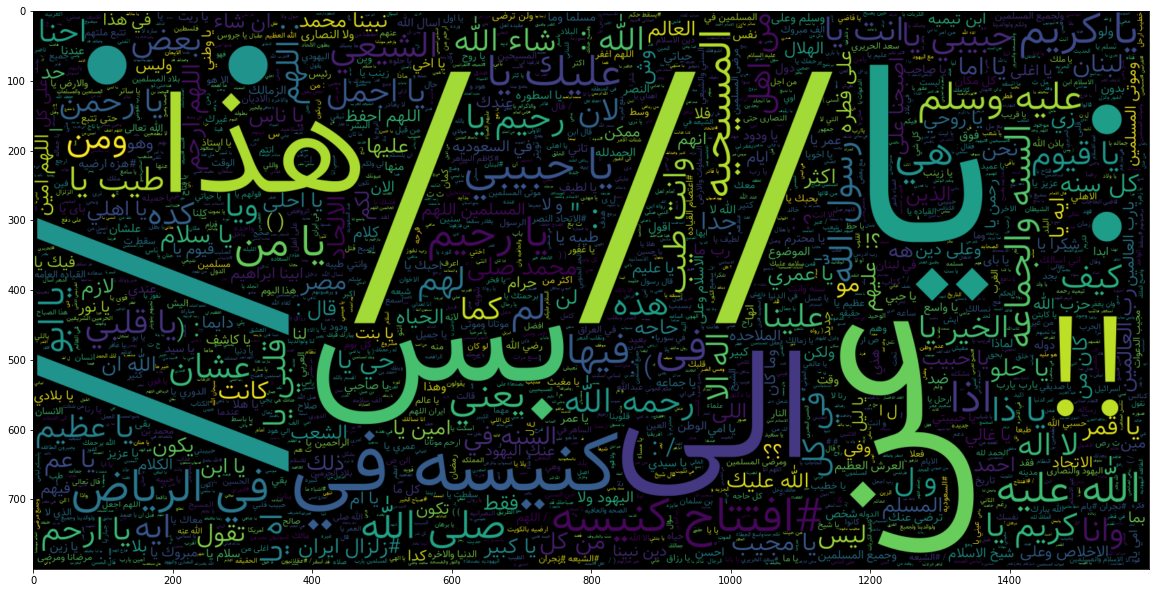

In [16]:
#Not Offensive Words
from wordcloud_fa import WordCloudFa


plt.figure(figsize = (20,20)) 
wc=WordCloudFa(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.off == 'NOT_OFF'].tweets))
# wc = WordCloud(font_path='/content/drive/MyDrive/MasterThesis/NotoNaskhArabic-Regular.ttf',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.off == 'NOT_OFF'].tweets))

image = wc.to_image()
image.save('wordcloud.png')
plt.imshow(wc , interpolation = 'bilinear')

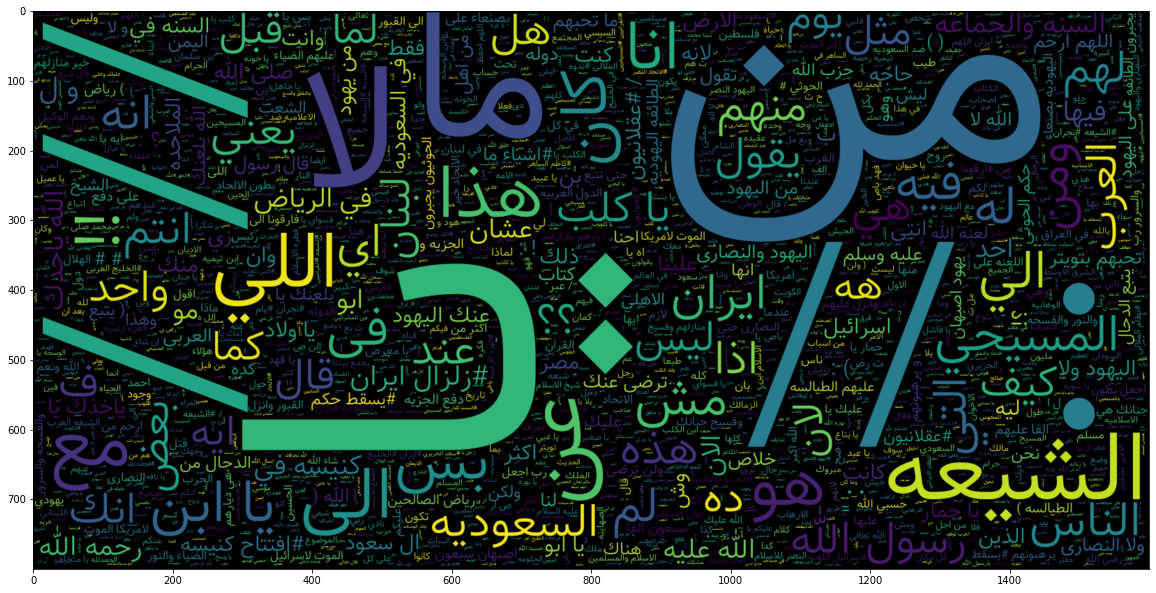

In [17]:
plt.figure(figsize = (20,20)) 
wc=WordCloudFa(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.off == 'OFF'].tweets))
image = wc.to_image()
image.save('wordcloudoff.png')
plt.imshow(wc , interpolation = 'bilinear')

# Train and Test Split

In [18]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 30000
MAX_SEQUENCE_LENGTH = 30


In [19]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 11311
Test Data size 2828


In [20]:
train_data.head(10)


,tweets,off
11226,اللهم استر جميع المسلمين قال رسول الله صلى الل...,NOT_OFF
1801,: اللهم امين يا رب العالمين يا رحمن يا رحيم يا...,NOT_OFF
943,والحنايا الي تضمك بانتظار من وله من خوف فيها ت...,NOT_OFF
2909,: انتظاري طال يا حلو التثني يا مليح الروح ما ه...,NOT_OFF
14057,هو السني الهوا شيعي الهويه هو الذي يحفظ الميسي...,OFF
2124,يا عم لا يا عم احنا نعجز وهما لا,NOT_OFF
761,يا نور عيني وانت صبحي وظلماي يا فرحتي يا سلوتي...,NOT_OFF
2641,حتى لو اني منك ضايق ومجروح عليك يا خوفي و يا ط...,NOT_OFF
11251,وفى حديث ابن عمر ان النبي صلى الله عليه وسلم ق...,NOT_OFF
11803,الكتب المعتبره عند الشيعه الاثنى عشريه || التش...,NOT_OFF


In [21]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweets)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 52165


In [22]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweets),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweets),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (11311, 30)
Testing X Shape: (2828, 30)


In [23]:
labels = train_data.off.unique().tolist()
labels

['NOT_OFF', 'OFF', 'off']

In [24]:
encoder = LabelEncoder()
encoder.fit(train_data.off.to_list())
encoder.fit(test_data.off.to_list())

y_train = encoder.transform(train_data.off.to_list())
y_test = encoder.transform(test_data.off.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

ValueError: ignored

# Word embedding

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz

In [ ]:
# !unzip cc.ar.300.vec.gz
!gunzip -k cc.ar.300.vec.gz

In [ ]:
!ls

In [ ]:
GLOVE_EMB = '/content/cc.ar.300.vec'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '/content/best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

#Model Training - LSTM¶


In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "NOT_OFF" if score>0.5 else "OFF"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

#Confusion Matrix¶


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


In [ ]:
cnf_matrix = confusion_matrix(test_data.off.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.off.unique(), title="Confusion matrix")
plt.show()

In [ ]:
#Classification Scores

print(classification_report(list(test_data.off), y_pred_1d))
